# 3 - 1
## 練習時間
在小量的資料上，我們用眼睛就可以看得出來程式碼是否有跑出我們理想中的結果

請嘗試想像一個你需要的資料結構 (裡面的值可以是隨機的)，然後用上述的方法把它變成 pandas DataFrame

#### Ex: 想像一個 dataframe 有兩個欄位，一個是國家，一個是人口，求人口數最多的國家

### Hints: [隨機產生數值](https://blog.csdn.net/christianashannon/article/details/78867204)

In [1]:
import pandas as pd
import numpy as np
import string
import re

In [2]:
People_List = np.random.choice(range(10000,1000000),10,replace = False)
Country_List = [''.join(np.random.choice(list(string.ascii_letters),5)) for i in range(0,10)]

data = {'國家': Country_List,
        '人口': People_List}

data = pd.DataFrame(data)
data

,人口,國家
0,92661,zrSuc
1,389785,oeTBl
2,134039,utDrU
3,404743,bDUpQ
4,430971,djXZw
5,434908,rylAu
6,963121,QFUrQ
7,357007,iUkSt
8,219179,TPYeM
9,689814,uELvs


### 人口最多國家

In [3]:

data[data['人口']==data['人口'].max()]

,人口,國家
6,963121,QFUrQ


# 3 - 2
## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

In [4]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [5]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


u'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [6]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'

data = data.split(split_tag)
print(len(data))
data[0]

9996


u'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

In [7]:
arrange_data = [i.split('\t') for i in data]

## 將 txt 轉成 pandas dataframe

In [8]:
import pandas as pd

    
df = pd.DataFrame(arrange_data,columns=['ID','Link'])
df.head()

,ID,Link
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

In [9]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0]['Link']

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array
np.array(img)
plt.imshow(img)
plt.show()

<Figure size 640x480 with 1 Axes>

In [54]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list = []
    for url in url_list:
        response = requests.get(url)
        if response.status_code!= 200:
            continue
       
        img = Image.open(BytesIO(response.content))
        if resize:
            img = img.resize((250, 250),Image.ANTIALIAS)
        
        # Convert img to numpy array
        img_array = np.array(img)
        img_list.append(img_array)
    
    return img_list

## 取前五個連結的圖片，並轉成array。 再從array轉回圖片

Total images that we got: 4 


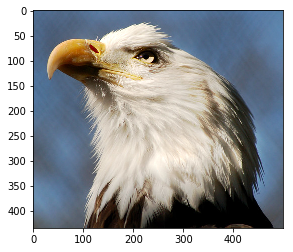

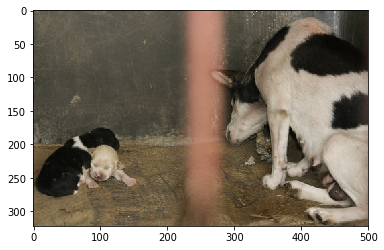

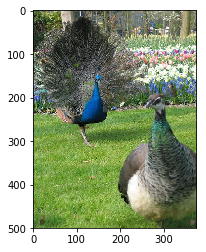

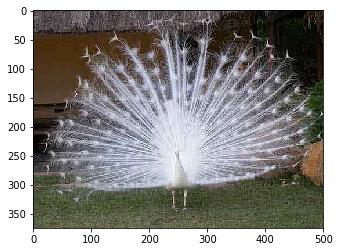

In [53]:
result = img2arr_fromURLs(df[0:5]['Link'].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    if isinstance(im_get,  np.ndarray):
        plt.imshow(im_get)
        plt.show()

## Resize Image

Total images that we got: 4 


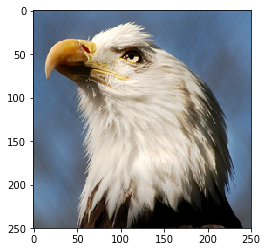

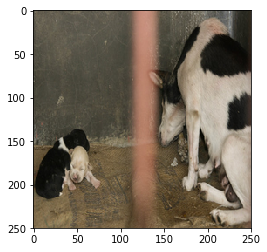

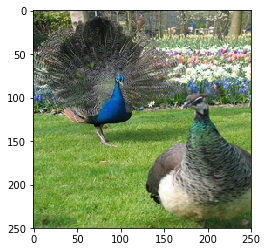

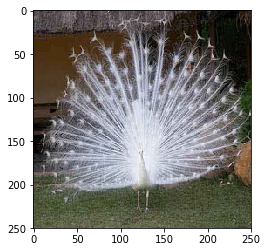

In [52]:
result = img2arr_fromURLs(df[0:5]['Link'].values,resize=True)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    if isinstance(im_get,  np.ndarray):
        plt.imshow(im_get)
        plt.show()